In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df= pd.read_csv(r"C:\Users\SAURABH GAVALI\Desktop\Saurabh\Advertising.csv",index_col=0)

In [4]:
df


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [5]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
print(df.dtypes)

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object


In [7]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

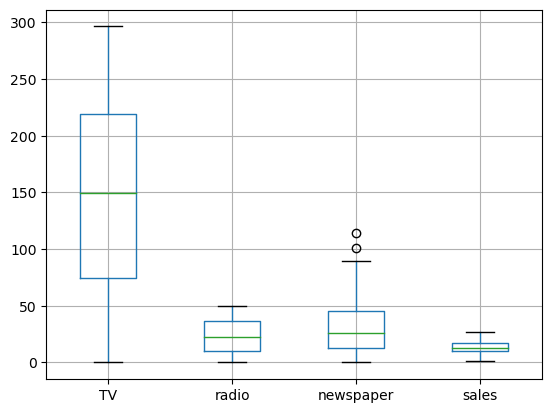

In [8]:
df.boxplot()

<Axes: >

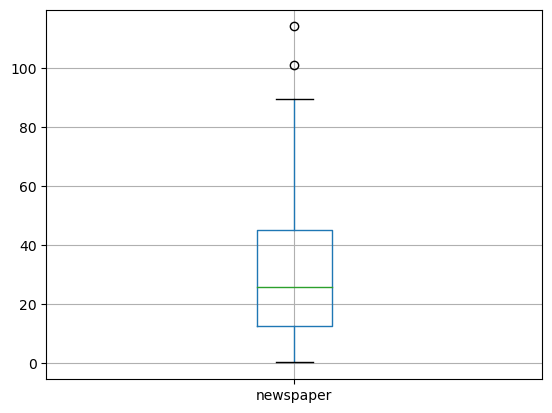

In [9]:

df.boxplot(column="newspaper")

In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
def missing_value(data):
    total=data.isnull().sum().sort_values(ascending=False)
    percent=(data.isnull().sum()/data.isnull().count()*100)
    missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
    return missing_data

In [12]:
miss=missing_value(df)
miss

,Total,Percent
TV,0,0.0
radio,0,0.0
newspaper,0,0.0
sales,0,0.0


<Axes: >

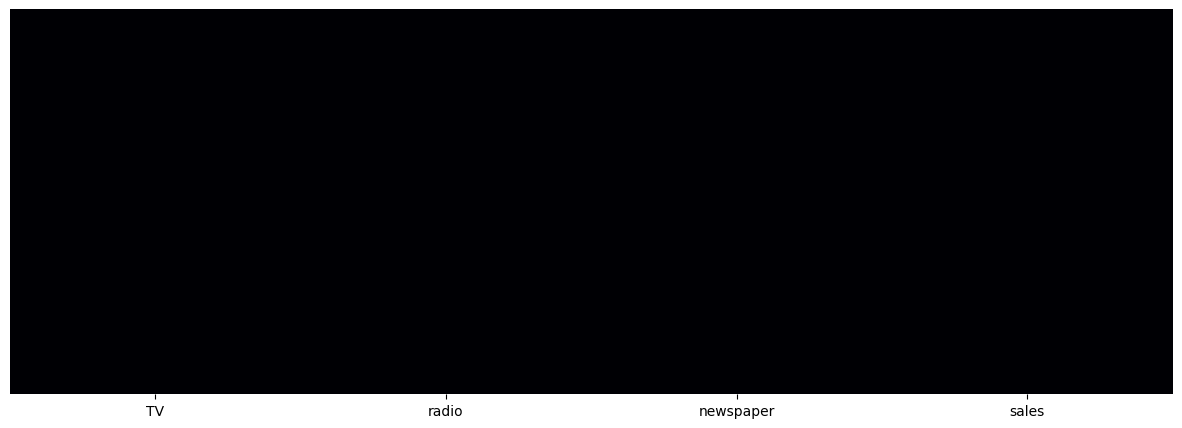

In [13]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap="magma")

In [14]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

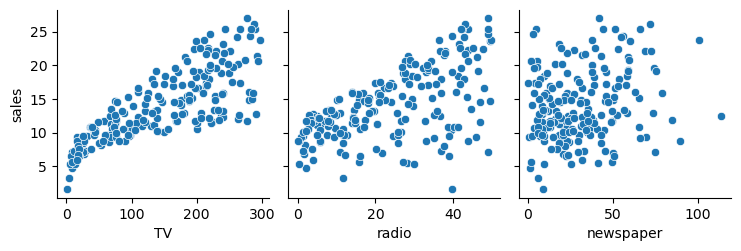

In [15]:
sns.pairplot(df,x_vars=['TV', 'radio', 'newspaper'],y_vars="sales"       )

In [16]:
feature_cols=['TV', 'radio', 'newspaper']
X=df[feature_cols]
y=df.sales

In [17]:
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [18]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

<Axes: xlabel='sales', ylabel='Density'>

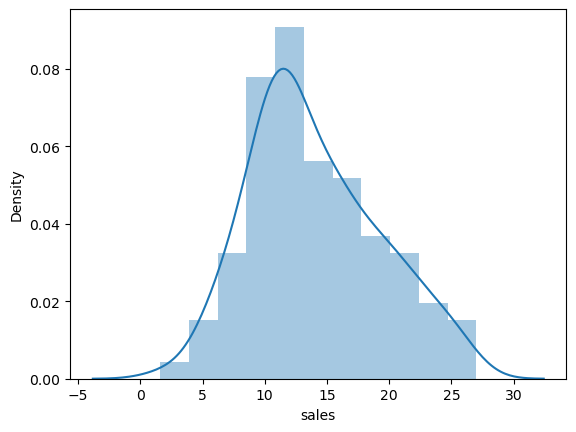

In [19]:
sns.distplot(y,hist=True)

<Axes: xlabel='sales', ylabel='Density'>

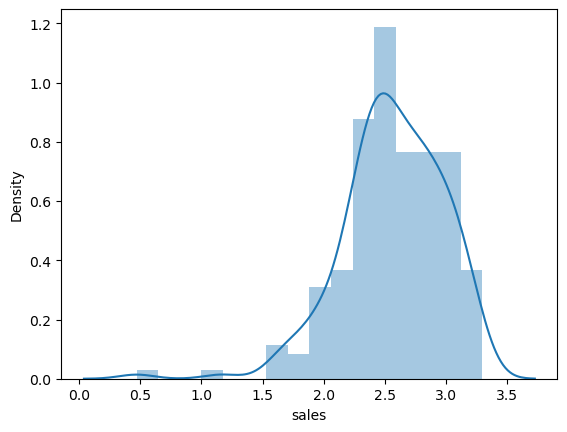

In [20]:
Y_log=np.log(y)
sns.distplot(Y_log,hist=True)

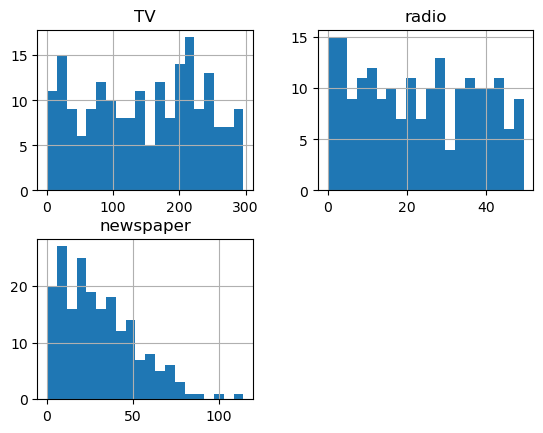

In [21]:
X.hist(bins=20)
plt.show()

In [22]:
data_skew=X.apply(lambda x: skew(x.dropna()))
data_skewed=data_skew[(data_skew>0.80) | (data_skew<-0.80)  ]
print(data_skew)
print(data_skewed)

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [23]:
X[data_skewed.index]=np.log1p(X[data_skewed.index])

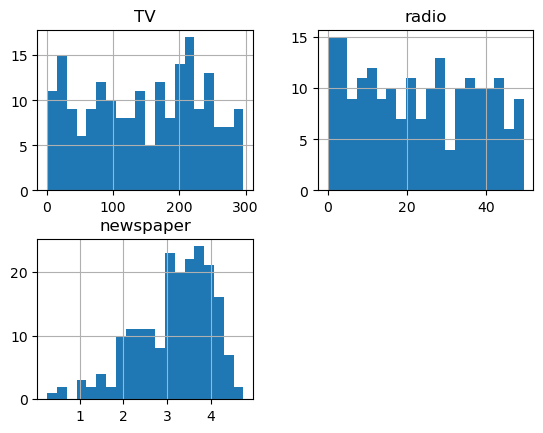

In [24]:
X.hist(bins=20)
plt.show()

In [25]:
corr_df=X.corr(method="pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


<Axes: >

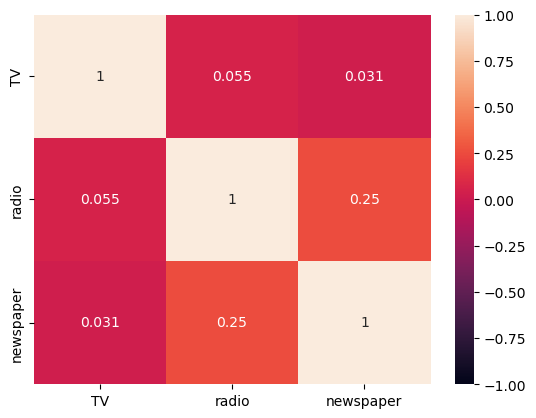

In [26]:
sns.heatmap(corr_df,vmax=1,vmin=-1,annot=True)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df=pd.DataFrame()
vif_df["features"]=X.columns
vif_df["vif factor"]=[vif(X.values,i) for i in range (X.shape[1])]
vif_df.round(2)

,features,vif factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                              test_size=0.2,
                                              random_state=10)

In [29]:
df.shape

(200, 4)

In [30]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [31]:
 from  sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

In [32]:
X_train

,TV,radio,newspaper
191,39.5,41.1,1.916923
8,120.2,19.6,2.533697
27,142.9,29.3,2.610070
139,43.0,25.9,3.068053
59,210.8,49.6,3.655840
...,...,...,...
114,209.6,20.6,2.459589
65,131.1,42.8,3.397858
16,195.4,47.7,3.987130
126,87.2,11.8,3.292126


In [33]:
X_train_scale

array([[0.12110845, 0.82758621, 0.36910949],
       [0.39719466, 0.39148073, 0.50670344],
       [0.4748546 , 0.58823529, 0.52374121],
       [0.13308245, 0.51926978, 0.62591103],
       [0.70715019, 1.        , 0.75703825],
       [0.07765994, 0.663286  , 0.61309872],
       [0.62880602, 0.34279919, 0.5971572 ],
       [0.78002053, 0.168357  , 0.44835052],
       [0.01094766, 0.56389452, 0.777408  ],
       [0.46219637, 0.28397566, 0.67339682],
       [0.1991105 , 0.2494929 , 0.60182933],
       [0.69380773, 0.1643002 , 0.68000727],
       [1.        , 0.73022312, 0.97301989],
       [0.54533014, 0.74036511, 0.41624968],
       [0.79815258, 0.09736308, 0.65505062],
       [0.16900445, 0.03448276, 0.63505936],
       [0.93328772, 0.98580122, 0.77950272],
       [0.66712282, 0.61460446, 0.76272954],
       [0.44543277, 0.09330629, 0.46173972],
       [0.21484776, 0.23123732, 0.75178892],
       [0.05234348, 0.31845842, 0.64384727],
       [0.75846733, 0.16024341, 0.84536828],
       [0.

In [34]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train_scale,y_train)

LinearRegression()

In [35]:
lm.intercept_

3.577703676256247

In [36]:
lm.coef_

array([12.78593321,  9.51672799, -0.21942783])

In [37]:
print(list(zip(feature_cols,lm.coef_)))

[('TV', 12.785933211080353), ('radio', 9.516727993391223), ('newspaper', -0.2194278300878496)]


In [38]:
X_test

,TV,radio,newspaper
60,210.7,29.5,2.332144
6,8.7,48.9,4.330733
21,218.4,27.7,3.996364
199,283.6,42.0,4.207673
53,216.4,41.7,3.703768
20,147.3,23.9,3.000720
163,188.4,18.1,3.280911
56,198.9,49.4,4.110874
70,216.8,43.9,3.339322
3,17.2,45.9,4.252772


In [39]:
y_pred=lm.predict(X_test_scale)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [40]:
ndf=pd.DataFrame()
ndf=X_test
ndf["actual sales"]=y_test
ndf["predicted sales"]=y_pred
ndf

,TV,radio,newspaper,actual sales,predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [41]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE:",rmse)

RMSE: 2.5929769110930594


In [42]:
print(min(y))
print(max(y))

1.6
27.0


In [43]:
ndf["deviation"]=ndf["actual sales"]-ndf["predicted sales"]

In [44]:
ndf

,TV,radio,newspaper,actual sales,predicted sales,deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490
20,147.3,23.9,3.000720,14.6,14.263259,0.336741
163,188.4,18.1,3.280911,14.9,14.927745,-0.027745
56,198.9,49.4,4.110874,23.7,21.388474,2.311526
70,216.8,43.9,3.339322,22.3,21.147529,1.152471
3,17.2,45.9,4.252772,9.3,12.757885,-3.457885


In [45]:
ndf.head()

,TV,radio,newspaper,actual sales,predicted sales,deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490
